In [0]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

# Architecture
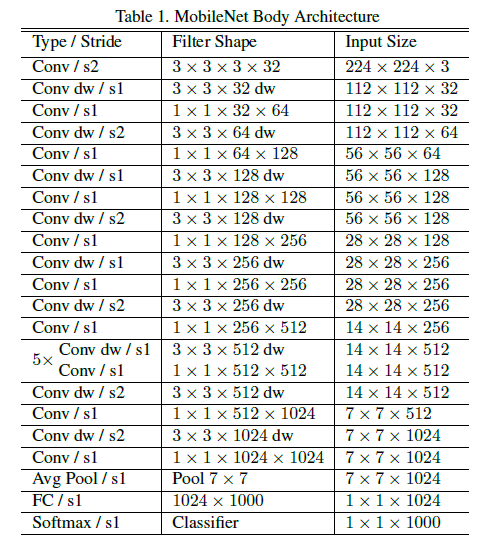

First we will design the depth wise convolution block. It consists of depth wise convolution and point wise convolution

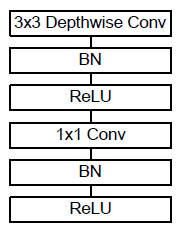

In [0]:
class Depth_Conv(nn.Module):
    def __init__(self,input_channel,output_channel,stride_=1):
      super(Depth_Conv,self).__init__()
      # depth wise conv
      self.dconv = nn.Conv2d(in_channels=input_channel,out_channels=input_channel,kernel_size=3,stride=stride_,groups=input_channel,padding=1,
                             bias=False)
      self.bn1 = nn.BatchNorm2d(num_features=input_channel)
      # point wise conv
      self.pconv = nn.Conv2d(in_channels=input_channel,out_channels=output_channel,kernel_size=1,stride=1,padding=0,bias=False)
      self.bn2 = nn.BatchNorm2d(num_features=output_channel)
      
  

    def forward(self,x):
      x = self.dconv(x)
      x = F.relu(self.bn1(x))
      x = self.pconv(x)
      x = F.relu(self.bn2(x))
      return x




Now lets code rest of the network

In [0]:
# convolution block
class Conv_Block(nn.Module):
    def __init__(self,input_channel,output_channel,stride_=1):
      super(Conv_Block,self).__init__()
      self.conv = nn.Conv2d(input_channel,output_channel,3,stride=stride_,padding=1,bias=False)
      self.bn = nn.BatchNorm2d(output_channel)

    def forward(self,x):
      x = self.conv(x)
      x = F.relu(self.bn(x))
      return x

In [0]:
class MobileNet(nn.Module):
  def __init__(self):
    super(MobileNet, self).__init__()
    self.model = nn.Sequential(
        Conv_Block( 3, 32, 2),
        Depth_Conv( 32, 64, 1),
        Depth_Conv( 64, 128, 2),
        Depth_Conv(128, 128, 1),
        Depth_Conv(128, 256, 2),
        Depth_Conv(256, 256, 1),
        Depth_Conv(256, 512, 2),
        Depth_Conv(512, 512, 1),
        Depth_Conv(512, 512, 1),
        Depth_Conv(512, 512, 1),
        Depth_Conv(512, 512, 1),
        Depth_Conv(512, 512, 1),
        Depth_Conv(512, 1024, 2),
        Depth_Conv(1024, 1024, 1),
        nn.AvgPool2d(7))
    self.fc = nn.Linear(1024, 1000)

  def forward(self,x):
    x = self.model(x)
    x = x.view(1,-1)
    x = self.fc(x)
    return x

    
    

In [82]:
model = MobileNet()
model

MobileNet(
  (model): Sequential(
    (0): Conv_Block(
      (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): Depth_Conv(
      (dconv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (pconv): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): Depth_Conv(
      (dconv): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=64, bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (pconv): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True

# Testing

In [84]:
image = torch.randint(low=1,high=255,size=(200,200,3)).permute(2,0,1)
image = image[None,:,:,:].float()

image.shape

torch.Size([1, 3, 200, 200])

In [85]:
out = model(image)
out.shape

torch.Size([1, 1000])